# Challenge (2/8): Datos abiertos del Instituto Nacional de Estadística y Geografía (INEGI)

¡Bien hecho! En el reto anterior aprendista mucho. Lograste:
1. Identificar una fuente de datos y consultarla.
2. Acceder a los datos descargados y hacer una breve exploración sobre ellos.
3. Formular algunas preguntas.
4. Planear cómo se verá tu dashboard.

Ahora nos toca comenzar a hacer algo de análisis exploratorio, comencemos con algunas gráficas para datos numéricos.

IMPORTANTE: Toma en cuenta las preguntas que planteaste en el reto anterior. Las variables numéricas involucradas en esas preguntas deberían ser exploradas en este reto con las gráficas propuestas.

## 1. Gráficas de distribución

Gráficas sugeridas:
- Histograma
- Distribución de densidad

Completa las siguientes tareas:
1. Selecciona las variables numéricas que consideres relevantes para tus preguntas del primer reto.
2. Construye una gráfica de distribución por cada una de ellas. Recuerda ajustar el número de "cortes" (bins) para observar mejor los valores relevantes en la distribución (solo histogramas).
3. Utiliza el atributo "hue" para que cada histograma represente alguna variable categórica de tu elección.
4. Utiliza el atributo "col" para generar subplots que representen subconjuntos de datos por categoría.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_theme(style="darkgrid")

#Instalaciones que pueden ser necesarias
# pip install matplotlib
# pip install seaborn

In [2]:
path = './data/mortalidad/conjunto_de_datos/evmor_11_valor.csv'

df = pd.read_csv(path)

df.head()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,año,valor,unidad_medida
0,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,1994,20798.0,Defunciones
1,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,1995,21482.0,Defunciones
2,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,1996,21469.0,Defunciones
3,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,1997,21492.0,Defunciones
4,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,1998,21759.0,Defunciones


In [3]:
# Limpieza de datos y renombre de columnas

df['year'] = df['año']

In [4]:
df_mod = df.drop('año', axis=1)
df_mod

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,valor,unidad_medida,year
0,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,20798.0,Defunciones,1994
1,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21482.0,Defunciones,1995
2,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21469.0,Defunciones,1996
3,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21492.0,Defunciones,1997
4,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21759.0,Defunciones,1998
...,...,...,...,...,...,...,...,...,...
10639,11,Guanajuato,996,No especificado,1002000037,Defunciones de menores de un año de sexo no es...,0.0,Defunciones,2016
10640,11,Guanajuato,996,No especificado,1002000037,Defunciones de menores de un año de sexo no es...,0.0,Defunciones,2017
10641,11,Guanajuato,996,No especificado,1002000037,Defunciones de menores de un año de sexo no es...,0.0,Defunciones,2018
10642,11,Guanajuato,996,No especificado,1002000037,Defunciones de menores de un año de sexo no es...,0.0,Defunciones,2019


In [5]:
# Convertimos la columna de object a fecha

df_mod['year'] = pd.to_datetime(df_mod['year'], format='%Y')
df_mod


,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,valor,unidad_medida,year
0,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,20798.0,Defunciones,1994-01-01
1,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21482.0,Defunciones,1995-01-01
2,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21469.0,Defunciones,1996-01-01
3,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21492.0,Defunciones,1997-01-01
4,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21759.0,Defunciones,1998-01-01
...,...,...,...,...,...,...,...,...,...
10639,11,Guanajuato,996,No especificado,1002000037,Defunciones de menores de un año de sexo no es...,0.0,Defunciones,2016-01-01
10640,11,Guanajuato,996,No especificado,1002000037,Defunciones de menores de un año de sexo no es...,0.0,Defunciones,2017-01-01
10641,11,Guanajuato,996,No especificado,1002000037,Defunciones de menores de un año de sexo no es...,0.0,Defunciones,2018-01-01
10642,11,Guanajuato,996,No especificado,1002000037,Defunciones de menores de un año de sexo no es...,0.0,Defunciones,2019-01-01


In [6]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10644 entries, 0 to 10643
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cve_entidad     10644 non-null  int64         
 1   desc_entidad    10644 non-null  object        
 2   cve_municipio   10644 non-null  int64         
 3   desc_municipio  10644 non-null  object        
 4   id_indicador    10644 non-null  int64         
 5   indicador       10644 non-null  object        
 6   valor           10644 non-null  float64       
 7   unidad_medida   10644 non-null  object        
 8   year            10644 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 748.5+ KB


In [7]:
df_mod['year'] = pd.to_datetime(df_mod['year'].dt.year)

df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10644 entries, 0 to 10643
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cve_entidad     10644 non-null  int64         
 1   desc_entidad    10644 non-null  object        
 2   cve_municipio   10644 non-null  int64         
 3   desc_municipio  10644 non-null  object        
 4   id_indicador    10644 non-null  int64         
 5   indicador       10644 non-null  object        
 6   valor           10644 non-null  float64       
 7   unidad_medida   10644 non-null  object        
 8   year            10644 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 748.5+ KB


Para nuestro analisis dividiremos el dataset en estado y municipios


In [8]:
df_estado = df_mod[df_mod['cve_municipio'] == 0]

df_estado.head()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,valor,unidad_medida,year
0,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,20798.0,Defunciones,1970-01-01 00:00:00.000001994
1,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21482.0,Defunciones,1970-01-01 00:00:00.000001995
2,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21469.0,Defunciones,1970-01-01 00:00:00.000001996
3,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21492.0,Defunciones,1970-01-01 00:00:00.000001997
4,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21759.0,Defunciones,1970-01-01 00:00:00.000001998


In [9]:
df_estado.tail()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,valor,unidad_medida,year
299,11,Guanajuato,0,Estatal,6200240526,Porcentaje de muertes por suicidio con respect...,10.562326,Porcentaje,1970-01-01 00:00:00.000002017
300,11,Guanajuato,0,Estatal,6200240526,Porcentaje de muertes por suicidio con respect...,8.920354,Porcentaje,1970-01-01 00:00:00.000002018
301,11,Guanajuato,0,Estatal,6200240526,Porcentaje de muertes por suicidio con respect...,7.934468,Porcentaje,1970-01-01 00:00:00.000002019
302,11,Guanajuato,0,Estatal,6200240526,Porcentaje de muertes por suicidio con respect...,7.059321,Porcentaje,1970-01-01 00:00:00.000002020
303,11,Guanajuato,0,Estatal,6200240526,Porcentaje de muertes por suicidio con respect...,6.985065,Porcentaje,1970-01-01 00:00:00.000002021


In [10]:
df_estado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 303
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cve_entidad     304 non-null    int64         
 1   desc_entidad    304 non-null    object        
 2   cve_municipio   304 non-null    int64         
 3   desc_municipio  304 non-null    object        
 4   id_indicador    304 non-null    int64         
 5   indicador       304 non-null    object        
 6   valor           304 non-null    float64       
 7   unidad_medida   304 non-null    object        
 8   year            304 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 23.8+ KB


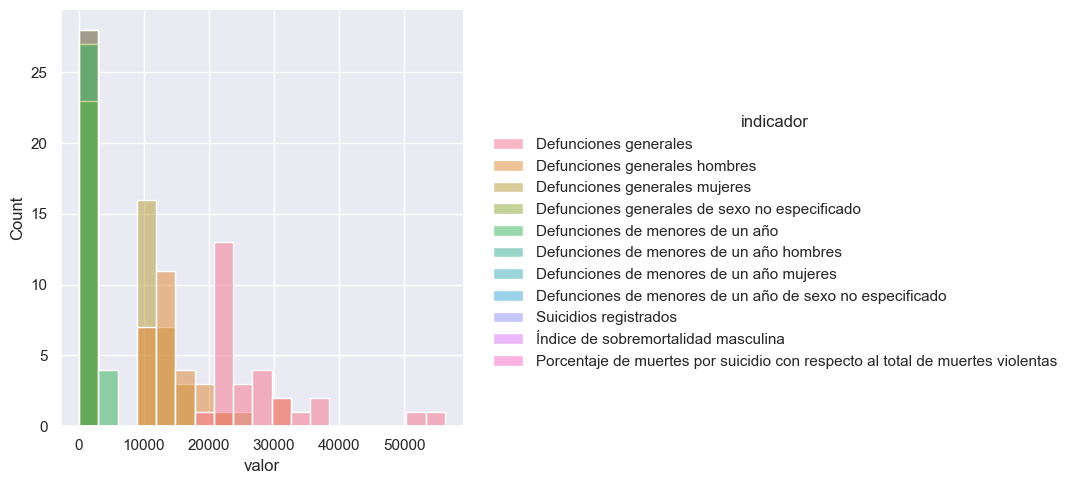

In [11]:
sns.displot(x='valor' ,data=df_estado, hue='indicador')


## 2. Gráficas de dispersión

- Scatter plot
- Pairplot
- Displot en su modalidad tipo heatmap

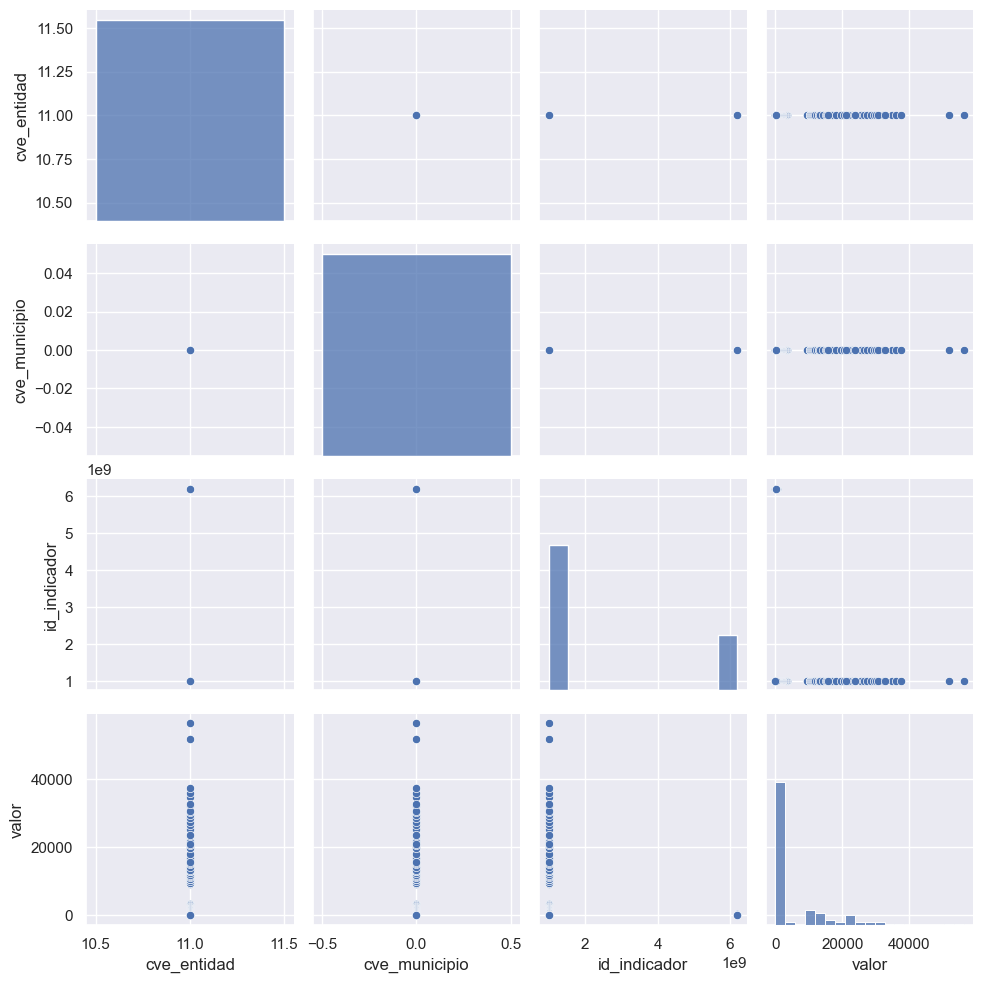

In [12]:
sns.pairplot(df_estado)



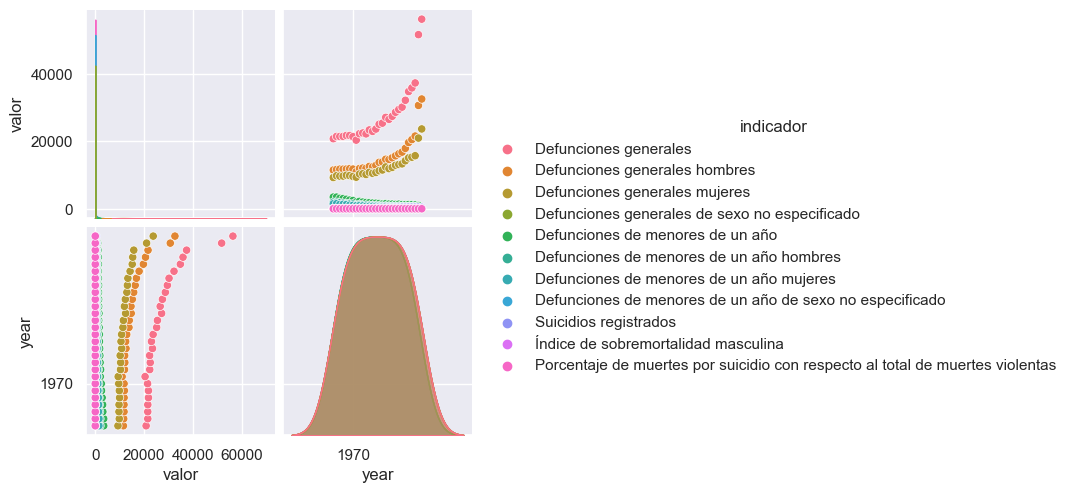

In [13]:
sns.pairplot(df_estado, hue='indicador', vars=['valor','year'])

## 3. Serie de tiempo

Una serie de tiempo no es más que el cambio de una variable numérica a través de una variable temporal. Ya que cuentas con ambas, construyamos una de estas series.

Completa las siguientes tareas:
- Construye una serie de tiempo haciendo uso de la columna de fechas de tu conjunto de datos y alguna de las variables numéricas de tu interés.
- Realiza tantas series como creas conveniente para responder tus preguntas y saciar tu curiosidad 😉

### Filtro de acuerdo al indicador y hacerlo mas facil de observar

In [14]:
df_generales = df_estado[df_estado['indicador'] == "Defunciones generales"]
df_generales_h = df_estado[df_estado['indicador'] == "Defunciones generales hombres"]
df_generales_m = df_estado[df_estado['indicador'] == "Defunciones generales mujeres"]
df_generales_na = df_estado[df_estado['indicador'] == "Defunciones generales de sexo no especificado"]

df_generales



,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,valor,unidad_medida,year
0,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,20798.0,Defunciones,1970-01-01 00:00:00.000001994
1,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21482.0,Defunciones,1970-01-01 00:00:00.000001995
2,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21469.0,Defunciones,1970-01-01 00:00:00.000001996
3,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21492.0,Defunciones,1970-01-01 00:00:00.000001997
4,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21759.0,Defunciones,1970-01-01 00:00:00.000001998
5,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21753.0,Defunciones,1970-01-01 00:00:00.000001999
6,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21401.0,Defunciones,1970-01-01 00:00:00.000002000
7,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,20375.0,Defunciones,1970-01-01 00:00:00.000002001
8,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,22285.0,Defunciones,1970-01-01 00:00:00.000002002
9,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,22493.0,Defunciones,1970-01-01 00:00:00.000002003


In [15]:
df_generales = df_generales.set_index('year')
df_generales_h = df_generales_h.set_index('year')
df_generales_m = df_generales_m.set_index('year')
df_generales_na = df_generales_na.set_index('year')

df_generales.head()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,valor,unidad_medida
year,,,,,,,,
1970-01-01 00:00:00.000001994,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,20798.0,Defunciones
1970-01-01 00:00:00.000001995,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21482.0,Defunciones
1970-01-01 00:00:00.000001996,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21469.0,Defunciones
1970-01-01 00:00:00.000001997,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21492.0,Defunciones
1970-01-01 00:00:00.000001998,11,Guanajuato,0,Estatal,1002000030,Defunciones generales,21759.0,Defunciones


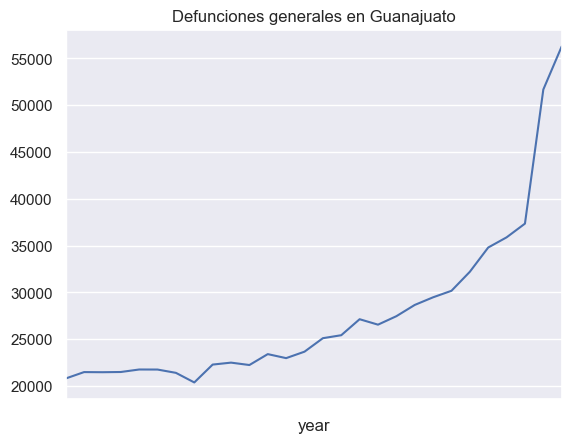

In [16]:
# Grafica respecto a las defunciones generales en todo el Estado

data_open = df_generales['valor'].plot(title="Defunciones generales en Guanajuato")


fig = data_open.get_figure()

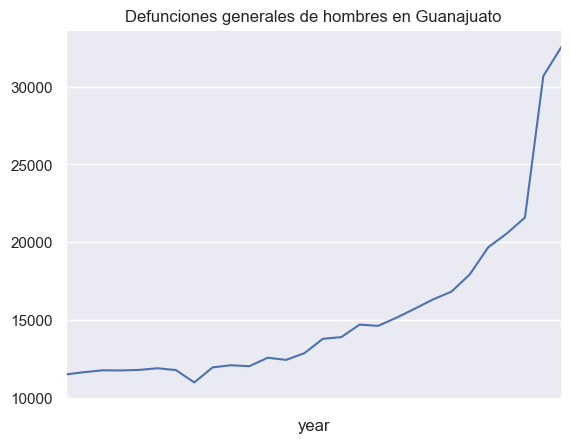

In [17]:
# Grafica respecto a las defunciones generales para hombres en todo el Estado

data_open_h = df_generales_h['valor'].plot(title="Defunciones generales de hombres en Guanajuato")


fig = data_open_h.get_figure()

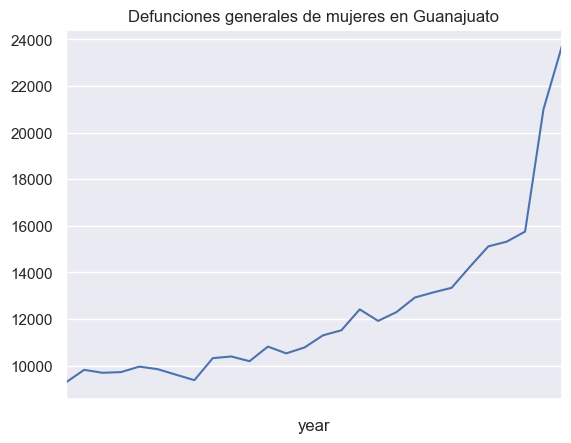

In [18]:
# Grafica respecto a las defunciones generales para mujeres en todo el Estado

data_open_m = df_generales_m['valor'].plot(title="Defunciones generales de mujeres en Guanajuato")


fig = data_open_m.get_figure()

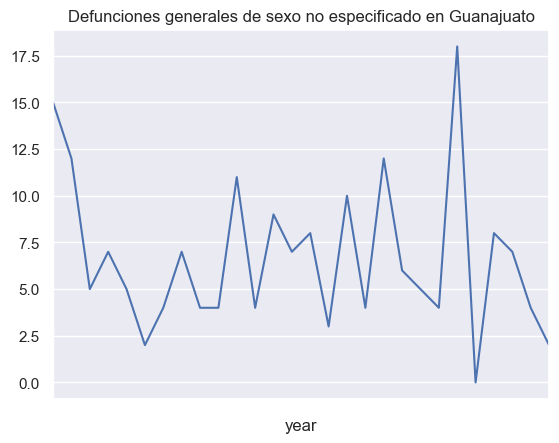

In [19]:
# Grafica respecto a las defunciones generales para sexo no especificado en todo el Estado

data_open_na = df_generales_na['valor'].plot(title="Defunciones generales de sexo no especificado en Guanajuato")


fig = data_open_m.get_figure()